Implement the Model inference in vectorized form 

The objective of this colab is 
* Demonstrate training data and model components of linear regression model.
* Demonstrate how simple it is to implement ML components and algorithms.

Let's first import necessary libraries


In [ ]:
from IPython.display import display, Math, Latex # Imported for proper rendering of latex in colab.
import numpy as np
# Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Quick recap
1. Traning data contains features and label that is real number.
2. Model or inference: **y=Xw**

#C1: Traning Data


In [ ]:
#Create a dataset of 100 examples with a single feature and a label.
#For this construction, we use the following three parameters:
w1=3
w0=4
n=100
x=10*np.random.rand(n,)

In [ ]:
X=10*np.random.rand(100)


In [ ]:
#Obtain y =4 + 3*x + noise . Noise is randomly sampled.
y=w0 + w1 *X + np.random.rand(n,)

Let's examine the shapes of training data for sanity check


In [ ]:
print('Shape of the training data feature matrix:', X.shape)
print('Shape of the label vector:', y.shape)

Shape of the training data feature matrix: (100,)
Shape of the label vector: (100,)


Let's divide the data into training and test set. We will set aside 20% examples for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

Let's do a quick sanity check to make sure the sizes of feature and lables set are identical both in training and test sets:


In [ ]:
print("Shape of training features matrix:", X_train.shape)
print("Shape of training features matrix:", y_train.shape)

Shape of training features matrix: (80,)
Shape of training features matrix: (80,)


In [ ]:
print('shape of test feature matrix:', X_test.shape)
print('shape of test feature matrix:', y_test.shape)

shape of test feature matrix: (20,)
shape of test feature matrix: (20,)


let's quickly check the first few examples and labels


In [ ]:
X_train[:5]

array([2.3524671 , 7.49300262, 1.89967955, 0.66130858, 9.34204539])

In [ ]:
y_train[:5]

array([11.24311479, 27.26303657, 10.31362346,  6.10859111, 32.55319639])

Let's visualize the training set.

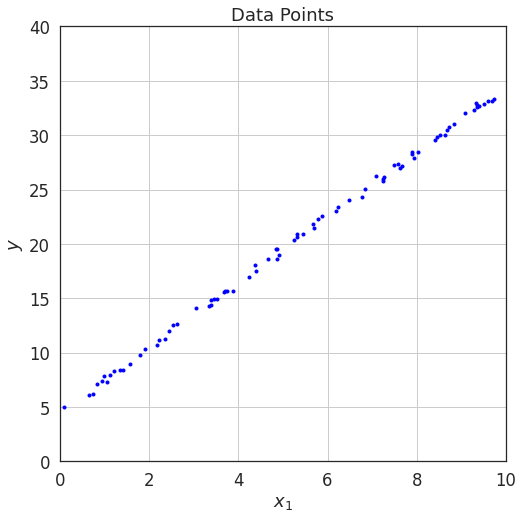

In [ ]:
sns.set_style("white")
f=plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=90,fontsize=18)
plt.axis([0,10,0,40])
plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature. It's form is $y=w_0 + w_1 x_1$.
As discussed in the lectures, we add a special dummy feature $x_0$ and set it to 1. We create a helper function for that.

In [ ]:
def add_dummy_feature(x):
  ''' Adds a dummy feature to the dataset.

  Args:
     x: Training dataset
  Returns:
     Training dataset with an addition of dummy feature.
  ''' 
  #np.ones(x.shape[0]) create a vector of 1's having the same number of rows as number of samples in dataset.
  return np.column_stack((np.ones(x.shape[0]),x)) 
  

Let's write a test case to test this function:
For that let's take two examples and three features. The first example is a feature vector:
\begin{equation}
X_{3 \times 1} ^{(1)} = \begin{bmatrix} 
3\\2\\5\\ \end{bmatrix} \end{equation}

and the seccond example is:
\begin{equation} \textbf X_{3\times 1} ^{(2)} = \begin{bmatrix} 9\\4\\7 \end{bmatrix} \end{equation} 

And recall that a feature matrix $\textbf X$ has shape $(n,m)$ corresponding to features of all examples before adding the dummy feature $x_0$.

\begin{equation}
X_{n\times m}  = \begin{bmatrix} 
-(\textbf x^{(1)})^{T} -\\-(\textbf x^{(2)})^{T} -\\ \vdots\\-(\textbf x^{(n)})^{T} -\\ \end{bmatrix} \end{equation}

In our current example, this becomes:
\begin{equation}
X_{2\times 3}  = \begin{bmatrix} 
-(\textbf x^{(1)})^{T} -\\-(\textbf x^{(2)})^{T} - \end{bmatrix} \end{equation}


\\
The corresponding feature matrix $\textbf X $ appears as follows:
\begin{equation}
X_{2\times 3}  = \begin{bmatrix} 
3 &2&5\\
9&4&7
\end{bmatrix} \end{equation}

Here the feature vectors are transposed and represented as rows:
* The first row corresponds to the first exam $\textbf (x^{(1)})^{T}$
and 
* The second row corresponds to the second example $(x^{(2)})^{T}$

Once we add the dummy feature, the resulting matrix becomes:




In [ ]:
import unittest

class TestAddDummyFeature(unittest.TestCase):
  def test_add_dummy_feature(self):
    ''' Test case funciton for add_dummy_feature'''
    train_matrix =np.array([[3,2,5],[9,4,7]])
    train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

    #test the shape
    self.assertEqual(train_matrix_with_dummy_feature.shape,(2,4))

    #add contents
    np.testing.assert_array_equal(
        train_matrix_with_dummy_feature,
        np.array([[1,3,2,5],[1,9,4,7]])
    )

unittest.main(argv=[''],defaultTest='TestAddDummyFeature', verbosity=2, exit=False)


test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case funciton for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [ ]:
add_dummy_feature(np.array([[3,2],[5,4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

Let's preprocess the training set to add the dummy feature.

In [ ]:
print('Before adding the dummy feature:\n', X_train[:5])
print()
X_train_with_dummy =add_dummy_feature(X_train)
print("After adding dummy feature:\n",X_train_with_dummy[:5])

Before adding the dummy feature:
 [2.3524671  7.49300262 1.89967955 0.66130858 9.34204539]

After adding dummy feature:
 [[1.         2.3524671 ]
 [1.         7.49300262]
 [1.         1.89967955]
 [1.         0.66130858]
 [1.         9.34204539]]


#C2.Model
The objective of this colab is to implements model and inference component from linear regression model.   

In [ ]:
#import library for model class

#Quick recap
1. Training data contains features and label that is real number.
2. Linear regression model uses linear combination of features to obtain labels. In vectorized form, this can be written as $\textbf y = \textbf {Xw}$

**Note**
* Model is parameterized by its weight vector.
* It is described by its mathematical form and weight vector.

#Implementation
The general vectorized form is as follows:
\begin{equation} 
\textbf y_{n\times 1} =\textbf X_{n \times (m+1)} \textbf w_{(m+1)\times 1}
\end{equation}

where 
* n is number of examples in dataset (train/test/validation).
* m is the number of features.
* \textbf X is a feature matrix contain $(m+1)$ features for $n$ examples along rows.(Notice capital case bold **X** used for matrix)
* **w** is weight vector containg $(m+1)$ weights one for each feature. (notice small case bold **w**)
* **y** is a label vector containing labels for $n$ examples with shape $(n,)$.


In [ ]:
def predict(X,w):
  
  assert X.shape[-1]==w.shape[0], "X and w don't have compatible dimensions"
  return X @ w #returns the predicted_label vector
  

We test this function with the following feature matrix $\textbf X_{2\times (3+1)}:$

\begin{equation} \textbf X_{2 \times (3+1)} = \begin{bmatrix} 1&3&2&5\\ 
1&9&4&7\end{bmatrix} \end{equation}
and weight vector $\textbf w$
\begin{equation} \textbf w_{4\times 1}= \begin{bmatrix}1\\1\\1\\1 \end{bmatrix} 
\end{equation}

Let's perform matrix-vecto multiplication between the feature matrix $\textbf X$ and a weight vector $\textbf w$ to obtain labels for all examples:
\begin{eqnarray}  \textbf y&=&\textbf {Xw} \\
&=&\begin{bmatrix} 1&3&2&5\\ 1&9&4&7 \end{bmatrix} \times \begin{bmatrix} 1\\1\\1\\1 \end{bmatrix}
\\ &=& \begin{bmatrix} 1\times 1+3 \times1 +2\times1+5\times1 \\ 1\times1 + 3\times1 + 2\times1 +5\times1 \end{bmatrix}\\ &=&\begin{bmatrix} 11\\21 \end{bmatrix} \end{eqnarray} 


In [ ]:
 import unittest
 class TestPredict(unittest.TestCase):
   '''Test case predict frunciton of linear regression'''
   def test_predict(self):

     '''Test case predict function of linear regression.'''

   #set up 
     train_matrix=np.array([[1,3,2,5],[1,9,4,7]])
     weight_vector =np.array([1,1,1,1])
     expected_label_vector=np.array([11,21])
    #call
     predicted_label_vector =predict(train_matrix,weight_vector)

    #asserts
    #test the shape
     self.assertEqual(predicted_label_vector.shape, (2,))
    
    #and contents
     np.testing.assert_array_equal(expected_label_vector,predicted_label_vector) #np.testing.assert_array_equal is a method to test whether two arrays are equal or not

unittest.main(argv=[''],defaultTest='TestPredict',verbosity=2, exit=False)




test_predict (__main__.TestPredict)
Test case predict function of linear regression. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


#Demonstration on synthetic dataset
# Dataset: $n=100, m=1,[w_0,w_1]=[4,3]$ 




In [ ]:
import numpy as np
n=100
w=np.array([4,3])
X=10*np.random.rand(100)
X=add_dummy_feature(X)
noise=np.random.rand(n,)
y= X@w + noise
print(X[:5],y[:5])

[[1.         5.3243538 ]
 [1.         5.31360863]
 [1.         5.10492993]
 [1.         0.65933827]
 [1.         9.57700921]] [20.06360044 20.77814227 19.54839841  6.92460721 33.50937447]


Preprocessing: Dummy feature and train-test split


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

Since we have not yet trained out model, let's use random weight vector to get predictions from out model for the given dataset.


In [ ]:
w_model=np.random.rand(2,) 
w_model

array([0.01720392, 0.41833583])

Let's compare the prediction with the actual value:


In [ ]:
y_hat=predict(X_train, w_model)
y_hat[:10]

array([3.29962509, 2.66464273, 1.08505021, 2.64268985, 1.53987223,
       3.0497196 , 1.82903615, 2.1377316 , 4.14583361, 2.5883216 ])

Actual labels are 

In [ ]:
y_train[:10]

array([27.66997872, 23.5774846 , 12.59906623, 23.80750283, 14.97854162,
       26.38935845, 17.50858248, 20.08462024, 34.50063355, 22.49837605])

#Since we used a random weight vector $\textbf w$ here, most of the predicted labels do not match the actual labels.


#Comparision of  vectorized and non-vectorized version of model inference

In [ ]:
def non_vectorized_predict(X,w):
  ''' Prediction of output label for a given input.

      Args:
          X: Feature matrix of shape (n,m+1)
          w: weight vector of shape (m+1,n)
      Returns: 
          y: Predicted label vector of shape(n,)'''
  y=[]
  for i in range(0,X.shape[0]):
    y_hat_i=0
    for j in range(0,X.shape[1]):
      y_hat_i+=X[i][j]*w[j]
    y.append(y_hat_i)
  return np.array(y)



Let's write a test for this function with the same set up as the vectorized implementation.


In [ ]:
import unittest 
class TestPredictNonVectorized(unittest.TestCase):
  def test_predict_non_vectorized(self):

    ''' Test case predict function of linear regression''' 
      #set up
    train_matrix = np.array([[1,3,2,5],[1,9,4,7]])
    weight_vector=np.array([1,1,1,1])
    expected_label_vector =np.array([11,21])

      #call
    predicted_label_vector = non_vectorized_predict(train_matrix , weight_vector)
      #asserts
      #test the shape
    self.assertEqual(predicted_label_vector.shape, (2,))
      #and contents
    np.testing.assert_array_equal(expected_label_vector,predicted_label_vector)
unittest.main(argv=[''],defaultTest='TestPredictNonVectorized',verbosity=2, exit=False)


test_predict_non_vectorized (__main__.TestPredictNonVectorized)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


Let's compare run time of vectorized and non-vectorized versions on dataset with 100 examples.

In [ ]:
import time
start_time=time.time()
y_hat_vectorized = predict(X_train,w)
end_time=time.time()

print("Total time incurred in vectorized inference is: %0.6f s"%(end_time-start_time))
start_time=time.time()
y_hat_non_vectorized=non_vectorized_predict(X_train,w)
end_time=time.time()
print("Total time incurred in non-vectorized inference is: %0.6f s"%(end_time - start_time))
np.testing.assert_array_equal(y_hat_vectorized, y_hat_non_vectorized)

Total time incurred in vectorized inference is: 0.000125 s
Total time incurred in non-vectorized inference is: 0.000521 s


#DATA generation

Let's try to check the difference in their performance on large dataset of 1 million data points.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
def generate_data(n=1000_000):
  X=10*np.random.rand(n)
  X=add_dummy_feature(X)
  noise=np.random.rand(n,)
  y= X@w + noise
  return X,y 

def preprocess(X,y):
  X_train,y_train,X_test,y_test = train_test_split(X,y, test_size=0.2, random_state=42) 
  return X_train, y_train,X_test,y_test


In [ ]:
X,y=generate_data(n=1000_000)
X_train, y_train,X_test,y_test = preprocess(X,y) 
start_time = time.time() 
y_hat_vectorized = predict(X_train,w) 
end_time = time.time() 

print("Total time incurred in vectorized inference is : %0.6f s" %(end_time-start_time))

start_time=time.time()
y_hat_non_vectorized=non_vectorized_predict(X_train,w) 
end_time=time.time() 
print('Total time incurred in non-vectorized inference is: %0.6f s'%(end_time-start_time)) 

np.testing.assert_array_equal(y_hat_vectorized , y_hat_non_vectorized)

Total time incurred in vectorized inference is : 0.002769 s
Total time incurred in non-vectorized inference is: 2.238766 s


Note that the time required for non-vectorized inference in order of magnitude more than the vectorized inference.

# C3 $ \cdot $ 
The objective of this colab is to implements loss function of linear regression model from scratch.
#Quick recap
1. Training data contains features and label that is real number.
2. Model or inference: $\textbf y = \textbf {Xw}$
3. Loss function: $ \begin{equation} J(\textbf w)= \frac{1}{2} (\textbf {Xw}-\textbf y)^T(\textbf{Xw}-\textbf y)\end{equation}$ 


#Implementation

The loss function is calculated as follows:
\begin{equation} J(\textbf w)= \frac{1}{2} (\textbf {Xw}-\textbf y)^T(\textbf{Xw}-\textbf y)\end{equation}

where
* $\textbf X$ is a feature matrix contain $(m+1)$ features for n examples along rows.
* $\textbf w$ is a weight vector containing $(m+1)$ weights one for each feature.
* $\textbf y$ is a label matrix containing labels for $n$ examples in a vector of shape $(n,)$

In [ ]:
def loss(X,y,w):
    e = (predict(X,w)) - y
  
    ''' Calculates loss for a model based on known labels.

        Args:
          X: Feature matrix for given inputs.
          y: Output label vecto as predicted by the given mdoel.
          w: Weight vector
        Returns: 
          Loss
    ''' 
    return (1/2)*((np.transpose(e))@e)


We will test this function with the following configuration:
1. Feature matrix $(\textbf X)$: \begin{equation} \textbf X_{2\times4}=\begin{bmatrix} 1&3&2&5\\ 
1&9&4&7\end{bmatrix}\end{equation}
2. Weight vector$(\textbf w)$: \begin{equation} \textbf w_{4\times 1}=\begin{bmatrix} 1\\1\\1\\1 \end{bmatrix} \end{equation}
3. Label vector $\textbf y$: 
 \begin{equation} \textbf y_{2\times 1}=\begin{bmatrix} 6\\11 \end{bmatrix} \end{equation}

 Let's compute the loss $J(\textbf w)$ i.e.

\begin{eqnarray} \textit J \left(\begin{bmatrix} 1\\1\\1\\1 \end{bmatrix}\right)&=& \frac{1}{2} (\textbf {Xw}-\textbf y)^T(\textbf{Xw}-\textbf y)\\
&=& \frac{1}{2}\left(\begin{bmatrix}1&3&2&5\\1&9&4&7 \end{bmatrix}\times \begin{bmatrix} 1\\1\\1\\1\end{bmatrix}-\begin{bmatrix} 6\\11\end{bmatrix}\right)^T \left(\begin{bmatrix}1&3&2&5\\1&9&4&7 \end{bmatrix}\times \begin{bmatrix} 1\\1\\1\\1\end{bmatrix}-\begin{bmatrix} 6\\11\end{bmatrix}\right)
\\
&=&\frac{1}{2}\left(\begin{bmatrix} 11\\21\end{bmatrix}-\begin{bmatrix} 6\\11\end{bmatrix}\right)^T\left(\begin{bmatrix} 11\\21\end{bmatrix}-\begin{bmatrix} 6\\11\end{bmatrix}\right)\\
&=&\frac{1}{2}\left(\begin{bmatrix} 5\\10\end{bmatrix}\right)^T\left(\begin{bmatrix} 5\\10\end{bmatrix}\right)\\
&=&\frac{1}{2}\left(\begin{bmatrix} 5&10\end{bmatrix}\begin{bmatrix} 5\\10\end{bmatrix}\right)\\
&=&\frac{1}{2}\left(\begin{bmatrix} 5\times5+10\times10\end{bmatrix}\right)\\
&=&\frac{1}{2}[125]=[62.5]
\end{eqnarray} 


In [ ]:
import unittest
class TestLossFunction(unittest.TestCase):

  def testt_loss_function(self):

      '''Test case for loss function of linear regression'''
      #set up 
      feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
      weight_vector = np.array([1,1,1,1]) 
      label_vector =np.array([6,11])
      expected_loss=np.array([62.5])
      #call
      loss_value = loss(feature_matrix,label_vector,weight_vector)
      #asserts
      #test the shape
      self.assertEqual(loss_value.shape, ())
      #and contents
      np.testing.assert_array_equal(expected_loss, loss_value)
unittest.main(argv=[''], defaultTest='TestLossFunction',verbosity=2,exit=False)


testt_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


Since we have not yet trained our model, let's use a random weight vector to calculate loss for linear regression model with single feature on synthetic dataset.


In [ ]:
w=np.random.rand(2,)


#Demonstration on synthetic dataset


#Generating training data
#Preprocessing: Dummy feature and train_test split

In [ ]:
X,y=generate_data(100) #y =4+3*X_1 + noise
X_train,X_test,y_train,y_test=preprocess(X,y)

Visualize error for each data point

In [ ]:
#visualize_loss_for_single_feature_model(X_train,y_train,w) # missing code search in week 1 of MLP

#Excercise
1. Plot loss as shown for an example above for different weight vectors. Which weight vecto has the best fitment?
2. Implement non-vectorized version of loss function and compare time between vectorized and non-vectorized version on datasets of different sizes.
    1. Implement non-vectorized version of loss computation ```loss_non_vectorized```:
      * for each poinnt, calculate the predicted value.
      * Calculate the square of difference between predicted and actual values.
      * Sum up these values across all training examples.
    2. Generate datasets with ``` generate_data``` function with  n=\{100,1000,10000,1000_000\}and for each dataset:
      * Calculate the loss with vectorized ```loss``` and non-vectorized versions```loss_non_vectorized```.
      * Record time before and after calling this function and calculate the time needed to compute the loss with these funcitons.

    3. Compare the times and note down your observations.



In [ ]:
'''import numpy as np
X=np.array([[1,2,2,1],[1,1,3,2]])
y=np.array([3,5])
w=np.array([1,2,3,4])
loss(X,y,2*w)''' #activity question

'import numpy as np\nX=np.array([[1,2,2,1],[1,1,3,2]])\ny=np.array([3,5])\nw=np.array([1,2,3,4])\nloss(X,y,2*w)'

#C4 Optimization
The objective of this colab is to implement optimization component of linear regression model.
It is implemented with one of the following two methods:
* Normal equation method, that sets the partial derivative of the loss function w.r.t. weight vector to 0 and solves the resulting equation to obtain the weight vector.
*Gradient descent method, that iteratively adjusts the weight vector based on the learning rate and the gradient of loss function at the current weight vector.


Normal equation
The weight vector is estimated by matrix multiplication of pseudo-inverse of feature matrix and the label vector.
The vectorized implementation is fairly straight forward.
* We make use of ```np.linalg.pinv``` for calculating pseudoinverse of the feature matrix.
 

In [ ]:
def normal_equation(X,y):

  ''' Estimates paramenters of the linear regression model with normal equation.
      
      Args:
         X: Feature matrix for given inputs.
         y: Actual label vector.
      Returns:
         weight vector'''
  return np.linalg.pinv(X) @ y
  

We test this function with the generated training set whose vector is known to use. 
* We set up the test with feature matrix, label vector and the expected weight vectors.
* Next we estimate the weight vector with ```normal_equation``` function.
* We test(a) shape and (b) match between expected and estimated weight vectors.


In [ ]:
import unittest 
class TestNormalEquation(unittest.TestCase):

  def test_normal_equation(self):
      ''' Test case for weight estimation for linear regression with normal equation method.'''
      #setup
      feature_matrix =  X_train
      label_vector = y_train 
      expected_weight_vector = np.array([4.,3.])

      #call

      estimated_weight_vector = normal_equation(feature_matrix, label_vector)

      #asserts
      # test the shape
      self.assertEqual(estimated_weight_vector.shape, (2, ))
      #and contents
      np.testing.assert_array_almost_equal(estimated_weight_vector , expected_weight_vector , decimal=0)
      
unittest.main(argv=[''],defaultTest='TestNormalEquation',verbosity=2,exit=False)      

test_normal_equation (__main__.TestNormalEquation)
Test case for weight estimation for linear regression with normal equation method. ... FAIL

FAIL: test_normal_equation (__main__.TestNormalEquation)
Test case for weight estimation for linear regression with normal equation method.
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-212-d17f8b0000f2>", line 19, in test_normal_equation
    np.testing.assert_array_almost_equal(estimated_weight_vector , expected_weight_vector , decimal=0)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 1044, in assert_array_almost_equal
    precision=decimal)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 840, in assert_array_compare
    raise AssertionError(msg)
AssertionError: 
Arrays are not almost equal to 0 decimals

Mismatched elements: 2 / 2 (100%)
Max absolute difference: 3.10651808
Max relative

#Gradient descent (GD):

GD is implemented as follows:
* Randomly initialize $\textbf w$ to $\textbf 0$.
* Iterate until convergence:
    * Calculate partial derivative of loss w.r.t weight vector.
    * Calculate new values of weights.
    * Update weights to new values $\textit {simultaneously}$. 
We use number of epochs as a convergence criteria in this implementation.

#Partial derivative of loss function

Let's first implement a function to calculate partial derivative of loss funciton, which is obtained with the following equation.
\begin{equation} \frac{∂}{∂ \textbf w}  J(\textbf w)= \textbf X^T(\textbf{Xw}-\textbf y)\end{equation} 

The multiplication of transpose of feature matrix with the difference of predicted and actual label  vectors.


In [ ]:
def calculate_gradient(X,y,w):
  ''' Calculates gradients of loss function w.r.t weight vector on training set.
      Arguments:
            X: Features matrix for training data.
            y: Label vector for training data.
            w: Weight vector
      Retruns:
            A vector of gradients.'''
  return np.transpose(X)@(predict(X,w)-y)


  

Let's write  a test case for gradient calculation wtih the following setup:
1. Feature matrix $(\mathbf X)$
\begin{equation} \textbf X_{2 \times 4} = \begin{bmatrix} 1&3&2&5\\ 
1&9&4&7\end{bmatrix} \end{equation}
2. weight vector $\textbf w$
\begin{equation} \textbf w_{4\times 1}= \begin{bmatrix}1\\1\\1\\1 \end{bmatrix} 
\end{equation}
3. Label Vector $y$: \begin{equation} y_{2 \times 1} =  \begin{bmatrix} 6\\11   \end{bmatrix} \end{equation}


Let's compute the partial derivative of loss $ J(\mathbf w) $ i.e
\begin{eqnarray} \frac{∂}{∂ \textbf w}  J(\textbf w)&=& \textbf X^T(\textbf{Xw}-\textbf y) \\ &=&\begin{bmatrix} 15\\105\\50\\95 \end{bmatrix}
\end{eqnarray}

In [ ]:
class TestCalculateGradient(unittest.TestCase): 
  def test_calculate_gradient(self):
    ''' Test case for gradient calculation. ''' 
    #set up 
    feature_matrix = np.array([[1,3,2,5], [1,9,4,7]])
    weight_vector = np.array([1,1,1,1])
    label_vector = np.array([6,11]) 
    expected_grad = np.array([15,105,50,95])

    #call 
    grad = calculate_gradient(feature_matrix, label_vector , weight_vector) 

    #asserts 
    #test the shape 
    self.assertEqual(grad.shape, (4, ))
    #and contents 
    np.testing.assert_array_almost_equal(expected_grad, grad, decimal =0)
unittest.main(argv=[''], defaultTest='TestCalculateGradient', verbosity=2 , exit=False)

test_calculate_gradient (__main__.TestCalculateGradient)
Test case for gradient calculation. ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


#Weight updates
Next let's implement the weight update part:
* We obtain the new weight from the old one by substracting gradient weighted by the learning rate.


In [ ]:
def update_weights(w,grad,lr):
  ''' Updates the weights based on the gradient of loss function.
  Weight updates are carried out with the following formula: 
      w_new = w_old - lr*grad # lr is learning rate 
  Args:
      1. w: weight vector
      2. grad: gradient of loss wrt w
      3. lr: learning rate (alpha)
  Retruns:
      Updated weight vector
      '''
  return (w - lr*grad)

Let's workout a weight update for :
1. Weight vector$(\textbf w)$: \begin{equation} \textbf w_{4\times 1}=\begin{bmatrix} 1\\1\\1\\1 \end{bmatrix} \end{equation} 
2. grad vector$(\textbf g)$: \begin{equation} \textbf g_{4\times 1}=\begin{bmatrix} 15\\105\\50\\95 \end{bmatrix} \end{equation}
3. Learning rate = 0.001

The updated weights are given by:
\begin{eqnarray}  \textbf w:&=&\textbf w^{(old)} -\alpha \mathbf g \\
&=&\begin{bmatrix} 1\\1\\1\\1\\  \end{bmatrix} -0.001\times \begin{bmatrix} 15\\105\\50\\95 \end{bmatrix}
\\ &=& \begin{bmatrix} 1-0.015\\1-0.105\\1-0.05\\1-0.095 \end{bmatrix} \\&=&\begin{bmatrix} 0.985\\0.895\\0.95\\0.095 \end{bmatrix}\end{eqnarray} 


In [ ]:
class TestUpdateWeights(unittest.TestCase):
  def test_update_weights(self):
    ''' Test case for weight update in GD'''
    #set up 
    weight_vector = np.array([1,1,1,1])
    grad_vector = np.array([15,105,50,95]) 
    lr =0.001
    expected_w_new = np.array([0.985,0.895,0.95,0.905])

    #call
    w_new = update_weights(weight_vector, grad_vector, lr)

    #asserts 
    #test the shape 
    self.assertEqual (expected_w_new.shape, (4,))

    #and contents 
    np.testing.assert_array_almost_equal(expected_w_new, w_new, decimal =1)
unittest.main(argv=[''], defaultTest='TestUpdateWeights', verbosity=2, exit=False) 


test_update_weights (__main__.TestUpdateWeights)
Test case for weight update in GD ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


copy later at 7:51 in optimization video

In [ ]:
 def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float, num_epochs:int):
    
    w_all=[]
    err_all=[]
    w =np.zeros((X.shape[1])) 
    print()
    for i in np.arange(0, num_epochs):
      w_all.append(w)
      err_all.append(loss(X,y,w))
      dJdW = calculate_gradient(X,y,w)

      if (i%100)==0:
        print('Iteration #:%d,loss: %4.2f'%(i,err_all[-1]))
      w = update_weights (w , dJdW , lr) 
    return w, err_all, w_all 

In order to test this function, we will use the synthetic training data that was generated earlier. We know the acutal weigths, that can be compared against the weights obtained from gradient descent procedure.

In [ ]:
class TestGradientDescent(unittest.TestCase):
  def test_gradient_descent(self):
    ''' Test case for weight update in GD'''
    
    ''' Test case for gradient calculation. ''' 
    #set up 
    feature_matrix = X_train 
    label_vector = y_train 
    expected_weight = np.array([4.,3.])

    #call 
    w, err_all, w_all = gradient_descent(feature_matrix,label_vector , lr=0.001 , num_epochs=2000)
    #asserts 
    #test the shape 
    self.assertEqual(w.shape, (2, ))
    #and contents 
    np.testing.assert_array_almost_equal(expected_weight, w, decimal =0)
unittest.main(argv=[''], defaultTest='TestGradientDescent', verbosity=2 , exit=False)

test_gradient_descent (__main__.TestGradientDescent)
Test case for weight update in GD ... /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in matmul
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':



Iteration #:0,loss: 415.36
Iteration #:100,loss: 5025311508723060321579174842766845714698092641265909760.00
Iteration #:200,loss: 62404942882339183872006932104379009214109581880068612265271479141074662449854648692997051015104797308092416.00
Iteration #:300,loss: 774952336663718024971888634865074692219733269949243889784198451494796375476832860162205567496682298317001370337993721543451441661030991105534741320777756311552.00
Iteration #:400,loss: 9623454431051504511972790010869723947127802551115545629633738874270143459961223488743224024369316871908450169586009447505866462312902055709832948725196747589961779343945806239289409603831237862058524345028837376.00
Iteration #:500,loss: 119505253168508164269176655613953195720373563724540164605933747811335308275889896467429859829411384091061804610688215005170378740681286011191256144306187478914186690385980495614178240535517000318888703866967332238511831613274160472469416824362833154455206100992000.00
Iteration #:600,loss:  inf
Iteration #:700,los

FAIL

FAIL: test_gradient_descent (__main__.TestGradientDescent)
Test case for weight update in GD
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-218-1907ca16f20e>", line 17, in test_gradient_descent
    np.testing.assert_array_almost_equal(expected_weight, w, decimal =0)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 1044, in assert_array_almost_equal
    precision=decimal)
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 764, in assert_array_compare
    flagged = func_assert_same_pos(x, y, func=isnan, hasval='nan')
  File "/usr/local/lib/python3.7/dist-packages/numpy/testing/_private/utils.py", line 740, in func_assert_same_pos
    raise AssertionError(msg)
AssertionError: 
Arrays are not almost equal to 0 decimals

x and y nan location mismatch:
 x: array([4., 3.])
 y: array([nan, nan])

----------------------------------------

In [ ]:
'''import numpy as np
w1 = 5 
w0 = 6 
n = 200
X=np.random.rand(n,)
y=w0+w1*X+np.random.randn(n,)
print('X sh',X.shape)
print('ysha',y.shape)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=36)
print(X_train.shape,y_train.shape,y_test.shape,X_test.shape)'''


"import numpy as np\nw1 = 5 \nw0 = 6 \nn = 200\nX=np.random.rand(n,)\ny=w0+w1*X+np.random.randn(n,)\nprint('X sh',X.shape)\nprint('ysha',y.shape)\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=36)\nprint(X_train.shape,y_train.shape,y_test.shape,X_test.shape)"

In [ ]:
'''import numpy as np
np.arange(12).reshape(-1,4)'''

'import numpy as np\nnp.arange(12).reshape(-1,4)'

In [ ]:
'''#@ [Plot learning curves]
def plot_learning_curves(err_all):
  plt.plot(err_all)
  plt.xlabel('iteration #')
  plt.ylabel('Loss: $J(\mathbf {w})$')'''

"#@ [Plot learning curves]\ndef plot_learning_curves(err_all):\n  plt.plot(err_all)\n  plt.xlabel('iteration #')\n  plt.ylabel('Loss: $J(\\mathbf {w})$')"

In [ ]:
'''from sklearn.model_selection import train_test_split
def preprocess(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42) 
  return X_train, X_test ,y_train, y_test
'''
X ,y = generate_data(100)
X_train ,X_test, y_tain,t_test = preprocess(X,y)



#Mini-Batch gradient descent (MBGD)

The key idea here to perform weight updates by computing gradient on batches of small number of examples.


In [ ]:
t0,t1 = 200,100000 
def learning_schedule(t):
  return t0/(t+t1) 


In [ ]:
def mini_batch_gd(X:np.ndarray, y:np.ndarray,num_iters:int, minibatch_size:int):

  ''' Estimates parameters of linear regression model through gradient descent.
  Args: 
  X: feature matrix for training data
  y: label vector  for training data
  num_iters: number of iterations.
  Returns:
    weight vector: Final weight vector
    Error vector across different iterations
    weight vectors across different iterrations
  '''
  w_all =[]# all parameters across iterations.
  err_all = [] # error across iterations 
  #parameter vector initialized to [0,0]

  w = np.zeros((X.shape[1]))
  
  t = 0 
  for epoch in range(num_iters):

    shuffled_indices = np.random.permutation(X.shape[0]) 
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, X.shape[0], minibatch_size):
      t+=1 
      xi = X_shuffled[i,i + minibatch_size]

      yi = y_shuffled[i,i + minibatch_size]

      err_all.append(loss(xi,yi,w))

      gradients = 2/minibatch_size * calculate_gradient(xi,yi,w)
      lr = learning_schedule(t)

      w = update_weights(w,gradients, lr)
      w_all.append(w)
  return w, err_all, w_all

In [ ]:
import unittest 
class TestMiniBatchGradientDescent(unittest.TestCase):
  
  def test_minibatch_gd(self):

    #set up 
    feature_matrix = X_train 
    label_vector = y_train 
    expected_weights = np.array([4.,3.])


    #call 
    w, err_all, w_all = mini_batch_gd(feature_matrix , label_vector ,200 , 8)

    #asserts 
    #test the shape 
    self.assertEqual(w.shape ,(2,))

    #and contents 
    np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)

unittest.main(argv=[''],defaultTest='TestMiniBatchGradientDescent',verbosity=2,exit=False)


test_minibatch_gd (__main__.TestMiniBatchGradientDescent) ... ERROR

ERROR: test_minibatch_gd (__main__.TestMiniBatchGradientDescent)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-225-1e1dcffcd3dd>", line 13, in test_minibatch_gd
    w, err_all, w_all = mini_batch_gd(feature_matrix , label_vector ,200 , 8)
  File "<ipython-input-224-93f6c9f3ed76>", line 28, in mini_batch_gd
    xi = X_shuffled[i,i + minibatch_size]
IndexError: index 8 is out of bounds for axis 1 with size 2

----------------------------------------------------------------------
Ran 1 test in 0.003s

FAILED (errors=1)


In [ ]:

X=np.arange(60).reshape(15,4)
X_shuffled = np.random.permutation(X.shape[0])
X_shuffled


array([14, 13, 10,  3,  9, 12,  5,  1,  6,  8,  0,  7,  2,  4, 11])